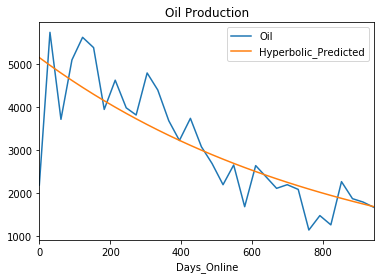

In [15]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

def hyperbolic_equation(t, qi, b, di):
    return qi/((1.0+b*di*t)**(1.0/b)) 

def get_max_initial_production(df, number_first_months, variable_column, date_column):
    df=df.sort_values(by=date_column)
    df_beginning_production=df.head(number_first_months)
    return df_beginning_production[variable_column].max()

file_path='short.csv'
desired_product_type='Oil' # or 'Gas'
    
df=pd.read_csv(file_path)
df['ReportDate']=pd.to_datetime(df['ReportDate'])

qi=get_max_initial_production(df, 5, desired_product_type, 'ReportDate')

popt_hyp, pcov_hyp=curve_fit(hyperbolic_equation, df['Days_Online'], 
                                    df[desired_product_type],bounds=(0, [qi,2,20]))

df.loc[:,'Hyperbolic_Predicted']=hyperbolic_equation(df['Days_Online'], *popt_hyp)

df.plot(x='Days_Online', y=[desired_product_type, "Hyperbolic_Predicted"], 
                                    title=f"Decline curve for {desired_product_type} Production")